# **Internship: Comparing sequence and 3Di token inputs for structure-aware protein language models**

### Welcome to the Pereira Lab! :) The following weeks you will be studying structure-aware protein language models, which can use both sequence and 3Di tokenized inputs at inference. Additionaly, you will evaluate how these resulting per-residue embeddings perform in secondary structure prediction.

## **Project description**

Structure-aware protein language models such as **[SaProt](https://doi.org/10.1101/2023.10.01.560349)**  are pretrained on both amino-acid **sequences** and **structural tokens (3Di)**, yet they can also operate in a sequence-only mode. These models generate per-residue embeddings that can be used directly for downstream tasks.

In this project, we compare the two inference modes: sequence-only input versus sequence combined with 3Di tokens and evaluate their impact on representation quality. Specifically, the per-residue embeddings from each mode will be used as input to a neural network classifier that we will design and train to predict the secondary-structure class of each residue. The goal is to assess how the inclusion of structural information influences embedding quality and improves downstream performance, such as secondary-structure prediction.

## **Tasks summary**

- Collect a dataset of proteins with known structures
- Extract amino-acid sequences and 3Di structural representations for each protein
- Load pre-trained SaProt model
- Generate per-residue embeddings using (1) sequence-only input and (2) sequence + 3Di input
- Build and train a multilayer perceptron (MLP) to classify each residue into its secondary-structure category
- Compare and visualize differences in embeddings and model predictions across the two inference modes


## **Introduction: Read through the articles introducing SaProt and Foldseek**

Here are the links to the article: **[SaProt](https://doi.org/10.1101/2023.10.01.560349)** and **[Foldseek](https://www.nature.com/articles/s41587-023-01773-0)**

### **SaProt (Structure-aware Protein Language Model)**

🔗 GitHub repository: https://github.com/westlake-repl/SaProt

SaProt is a protein language model that jointly learns from amino-acid sequences and 3D structural information.
Instead of using only the raw sequence (like ESM or ProtT5), SaProt learns from a paired representation:
* AA tokens → the normal amino-acid letters
* 3Di tokens → discrete structural tokens describing the local 3D geometry of each residue
This makes SaProt better at tasks where structure matters (GO prediction, binding site prediction, mutation effects, etc.).

![Figure 1](https://drive.google.com/uc?export=view&id=1aN9P7h2RXsEAaKJeiFfU8uo_5_inm7YK)


### **Foldseek**
🔗 GitHub repository: https://github.com/steineggerlab/foldseek

Foldseek is a fast tool that converts protein structures into 3Di descriptors—a compact, sequence-like representation of local 3D geometry.
For each residue, Foldseek outputs a 3Di structural token describing:
* backbone shape
* neighbor residue orientation
* spatial environment

These descriptors form a structural sequence similar to amino acids.

SaProt uses Foldseek to convert 3D structures into 3Di structural tokens, pairs them with amino-acid tokens, and trains a language model to learn sequence-aware and structure-aware representations simultaneously.

![Figure 2](https://drive.google.com/uc?export=view&id=1SfXmf2xuek59I97qyOSQ1UoYNL-hA-K7)



Eiwittaalmodellen zoals SaProt zijn ontwikkeld om eiwitsequenties te begrijpen op een manier die vergelijkbaar is met hoe taalmodellen menselijke taal begrijpen. Waar een taalmodel de betekenis van woorden leert uit tekst, leert een eiwittaalmodel de “betekenis” van aminozuren binnen hun biologische context. Het doel van zulke modellen is om verscholen informatie in eiwitsequenties te vatten in numerieke vectoren – embeddings – die allerlei structurele en functionele eigenschappen impliciet coderen. Sommige recente modellen, waaronder SaProt, gaan een stap verder: zij worden niet alleen getraind op aminozuursequenties, maar ook op representaties van de driedimensionale structuur van eiwitten. Daardoor leren ze een rijkere interne voorstelling, waarin zowel lineaire als ruimtelijke relaties tussen residuen zijn vervat. Zulke modellen zijn bijzonder waardevol, omdat ze voorspellingen mogelijk maken voor eiwitten waarvan de 3D-structuur nog onbekend is – een enorm relevant probleem in de bio-informatica.
In jullie project bestudeer je hoe goed SaProt zulke representaties werkelijk begrijpt. Je gaat dus niet zelf het grote taalmodel trainen; dat is al gedaan op enorme datasets en vergt reusachtige rekenkracht. In plaats daarvan gebruik je het voor “inference”: het model krijgt een eiwit te zien en produceert embeddings voor elk residu, net zoals een taalmodel embeddings maakt voor elk woord in een zin. Wat je wilt weten, is hoe groot het verschil is tussen embeddings die het model maakt wanneer het alleen de aminozuursequentie krijgt, en embeddings die worden gemaakt wanneer het naast de sequentie ook structurele 3Di-tokens binnenkrijgt. Omdat je van het eiwit in de dataset de 3D-structuur kent, beschik je vanzelf over de 3Di-informatie die het model kan gebruiken.
Om die embeddings te kunnen vergelijken, moet je ze koppelen aan een concrete taak. Je kiest daarbij niet voor volledige 3D-structuurvoorspelling – dat is veel te complex en ver buiten de scope van dit project – maar voor iets dat een stuk eenvoudiger én diagnostisch is: secundaire-structuurvoorspelling per residu. Dat betekent dat je voor elk aminozuur wilt weten of het in de echte structuur tot een α-helix, een β-streng of een coil behoort. Zo’n taak is ideaal om de kwaliteit van embeddings te testen, omdat goede embeddings automatisch informatie bevatten die nauw verwant is aan de lokale structuur. Hoe beter de embeddings die uit SaProt komen, hoe makkelijker een klein neuraal netwerk zo’n secundaire-structuurklasse kan leren voorspellen.
Het project verloopt ongeveer als volgt. Je verzamelt eiwitten waarvan de structuur al experimenteel bepaald is. Daardoor kun je uit die structuren zowel de aminozuursequentie als de 3Di-tokens afleiden. Elk eiwit voer je vervolgens twee keer door het voorgetrainde SaProt-model: één keer met alleen de sequentie en één keer met sequentie plus 3Di. Zo ontvang je voor iedere residupositie twee verschillende embeddingsets. Die embeddings dienen vervolgens als input voor een eenvoudig, zelf te trainen neuraal netwerk – meestal een multilayer perceptron – dat moet leren om voor elk residu de juiste secundaire-structuurklasse te voorspellen. Je traint dit netwerk op een deel van de dataset en test het op een ander deel, zodat je kunt zien hoe goed de embeddings generaliseren naar nieuwe eiwitten.
Door daarna de prestaties van het netwerk in de twee modusvarianten te vergelijken – dus sequentie-only versus sequentie-plus-3Di – kun je beoordelen hoeveel extra voorspellende kracht de structurele input aan het taalmodel toevoegt. Als embeddings uit de 3Di-modus leiden tot duidelijk betere secundaire-structuurvoorspellingen, wijst dat erop dat SaProt de structurele informatie echt benut en dat de representaties rijker en biologisch betekenisvoller worden. Op die manier leer je dus niet direct een 3D-structuur voorspellen, maar evalueer je wél hoe geschikt dit type model is om structurele eigenschappen van nieuwe, onbekende eiwitten af te leiden.


STAPPENPLAN:

1)	Gebruik het reeds voorgetrainde SaProt-model
SaProt is vooraf getraind op grote eiwitdatasets waarin zowel aminozuursequenties als 3Di-structurele tokens zaten. Jij hoeft dit model niet opnieuw te trainen.

2)	Verzamel een dataset van eiwitten met bekende 3D-structuren
Je haalt eiwitten uit bv. de PDB, zodat je zowel:
-	de aminozuursequentie per residu hebt
-	en de echte experimentele structuur

3)	Genereer 3Di-tokens uit de 3D-structuur
Met FoldSeek/3Di-module zet je de 3D-structuur om in een compacte reeks 3Di-labels, één per residu.

4)	Voer elk eiwit twee keer door SaProt
- Modus A: alleen de sequentie → embeddings A
- Modus B: sequentie + 3Di-tokens → embeddings B
SaProt voorspelt niets; het genereert enkel per-residue embeddings in beide modi.

5)	Gebruik deze embeddings als input voor een eigen neuraal netwerk
Je bouwt en traint een eenvoudige MLP die voor elk residu de secundaire structuur (helix, sheet, coil) moet leren voorspellen op basis van de embeddings.
Je traint twee modellen: één op embeddings A en één op embeddings B.

6)	Vergelijk de prestaties tussen beide modi
Door te kijken hoe goed het MLP de secundaire structuur voorspelt in beide gevallen, bepaal je:
-	hoeveel structurele informatie SaProt zélf uit sequentie kan afleiden
-	en hoeveel extra kwaliteitswinst de 3Di-input oplevert


BESLUIT:

Dus SaProt is een PLM, een model dat gewoon leert van AZ-sequenties en 3D structuur informatie. Het maakt hiervan embeddings (een taal die voor de computer begrijpbaar is).
Die embeddings worden gebruikt als input voor een MLP. Dit is wél een voorspeller van structuur. Het probeert uit elke embedding de secundaire structuur per residu te voorspellen.

## **Python tutorials: Get started with Python coding for Bioinformatics**

To get started with Python coding, the following link covers foundational Python concepts (variables, data types, lists, dictionaries, control flow, functions), then moves into file I/O (e.g., reading FASTA files), modules and external libraries (including Biopython), and finally data-analysis tools (such as pandas, seaborn) applied to biological sequence data and plots.

You can play a bit around with the different notebooks to familiarize yourself with the most important libraries.

Here is the link: [Computational Genomics Manual](https://linsalrob.github.io/ComputationalGenomicsManual/Python/)

## Using ```!``` in Google Colab

In Google Colab, putting an exclamation mark ```!``` in front of a command tells the notebook to run it in the shell (command line) instead of Python. For example, ```!ls``` lists files in the current directory, and ```!pip install``` installs a package from the command line.

Door '!' voor een commando te zetten, zeg je tegen Python 'Voer dit uit alsof ik in een command-line/terminal (zoals Bash) zit'. Dus hiermee kun je bash commando's ook in Python doen.

> Install packages for the runtime

In [1]:
# Install useful packages
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install biopython
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.0 MB/s eta 0:00:00




> Install conda on the google collab to be able to use conda environments (see the documentation [here](https://docs.conda.io/projects/conda/en/stable/user-guide/getting-started.html))



Colab is een tijdelijke werkruimte in de cloud. Alles wat je daar maakt of opslaat (bestanden, resultaten, variabelen) verdwijnt als je sessie stopt of crasht.

> Mount google drive to store the files and results generated

Door Google Drive te mounten, koppel je die tijdelijke werkruimte aan je eigen Drive.
Dat betekent dat:
- Je bestanden uit je Google Drive kunt lezen in Colab.
- Je resultaten in Colab kunt opslaan in Drive, zodat ze permanent bewaard blijven

In [5]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Nu zijn alle benodigde Python-pakketten (zoals Matplotlib, NumPy, Pandas, Seaborn, Biopython, enz.) nu geïnstalleerd in je Colab-omgeving. Dat betekent dat je plots, grafieken, histogrammen, analyses en bioinformatica-berekeningen kunt uitvoeren.

En Google Drive is gemount in Colab. Je kunt nu bestanden uit je drive lezen én alles wat je in opslaat/maakt, blijft permanent bewaard in je Drive, ook als Colab wordt afgesloten.

- Om secundaire-structuurvoorspelling te kunnen evalueren, heb je een dataset nodig van eiwitten waarvan de 3D-structuur experimentieel bepaald is. Deze gegevens zijn beschikbaar in databases zoals de Protein Data Bank (PDB), waar je specifieke eiwitten kunt downloaden in formaten zoals .pdb of .cif. Bij het samenstellen van zo’n dataset zijn enkele criteria belangrijk: de structuur moet een goede resolutie hebben (idealiter beter dan 2,5 Å), de eiwitsequenties mogen niet te veel op elkaar lijken (bijvoorbeeld ≤30% identiek), en de dataset moet een evenwichtige verdeling hebben van residuen in α-helices, β-strengen en coils.

- Deze bestanden verwerk je met DSSP, dat de ruwe 3D-structuur omzet in een vorm die begrijpbaar en bruikbaar is voor computers. In plaats van met ingewikkelde coördinaten te werken, kun je nu voor elk residu zien in welke secundaire-structuur het zich bevindt, wat de input of de “ground truth” vormt voor downstream analyses zoals het trainen of evalueren van een neuraal netwerk dat secundaire structuur probeert te voorspellen.

## **Collect a dataset of proteins with known structures**

To evaluate secondary structure prediction, you need proteins with experimentally determined 3D structures.

Suggested datasets:
* Protein Data Bank (PDB) – download a curated subset
* Secondary structure annotations can be generated automatically with DSSP (see below for more information)


Criteria:
* Good structural resolution (<2.5 Å ideally)
* Nonredundant sequences (≤30% sequence identity)
* Balanced number of residues in helix/sheet/coil classes

Output of this task:
* A set of .pdb or .cif files
* A metadata file listing protein IDs

### **DSSP**
Link: https://pdb-redo.eu/dssp

**DSSP** (Dictionary of Secondary Structure in Proteins) is an algorithm originally designed by Wolfgang Kabsch and Chris Sander to standardise secondary structure assigment based on atomic coordinates.

**What DSSP Does**

Given a protein structure (PDB or mmCIF file), DSSP:


1.   Reads atomic coordinates (especially the backbone atoms)
2.   Analyzes hydrogen bonds
3.   Calculates backbone geometry (angles, distances)
4.   Assigns each residue a secondary structure label

The labels reflect the local 3D conformation.

**What DSSP Outputs**

For each residue, DSSP assigns one of the following:

H = Alpha helix (4-12)

B = Isolated beta-bridge residue

E = Strand

G = 3-10 helix

I = Pi helix

T = Turn

S = Bend

P = κ-helix (poly-proline II helix)

**-** = None



Met onderstaand commando installeer je DSSP op je systeem:

In [6]:
!apt-get update
!apt-get install -y dssp

Get:1 https://cli.github.com/packages stable InRelease [3,917 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://cli.github.com/packages stable/main amd64 Packages [343 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages 

from Bio.PDB import PDBParser, DSSP
- haalt de tools 'PDBParser' en 'DSSP' binnen (de rest van de code zal ze echt gaan implementeren)

file_path = "/content/drive/MyDrive/Internship/example1.pdb"
- Je vertelt Python welk PDB-bestand je wilt analyseren -> dit kan je aanpassen naar een pdb bestandje in het mapje 'Dataset'

parser = PDBParser()
- Maakt een PDB-parser object aan

structure = parser.get_structure("model", file_path)
- Hier gebruikt de parser het bestand dat je hebt opgegeven in file_path. Het leest alle ketens, residuen en atomen van het eiwit in en zet dit om naar een Python-object (structure).

model = structure[0]
- kiest het eerste model uit van de reeks modellen in een pdb-file (NMR experimenten genereren vaak 10-tallen modellen van hetzelfde eiwit, die een beetje van elkaar verschillen, maar wij willen er slechts 1 gebruiken)

dssp = DSSP(model, file_path)
- past DSSP toe op de pdb-file

print("residues:", len(dssp))
- print het aantal residuen dat DSSP heeft geanalyseerd

for key in dssp.keys():
    chain_id, res_id = key
    aa = dssp[key][1]          # Amino acid
    ss = dssp[key][2]          # Secondary structure
    print(chain_id, res_id, aa, ss)
- toont voor elk residu de keten (= sommige eiwitten bestaan uit meerdere ketens, voor een eenvoudig eiwit zal hier gewoon 'A' staan), het residu-ID (= het nummer van het AZ binnen die keten), het aminozuur, de secundaire structuur

In [7]:
from Bio.PDB import PDBParser, DSSP    #https://biopython.org/docs/1.76/api/Bio.PDB.DSSP.html

file_path = "/content/drive/MyDrive/Internship-src/Dataset/AF-P04710-F1-model_v4.pdb"

# Parse the PDB file
parser = PDBParser()
structure = parser.get_structure("model", file_path)

# Use the first model in the structure
model = structure[0]

# Run DSSP
dssp = DSSP(model, file_path)

print("residues:", len(dssp))

for key in dssp.keys():
    chain_id, res_id = key
    aa = dssp[key][1]          # Amino acid
    ss = dssp[key][2]          # Secondary structure
    print(chain_id, res_id, aa, ss)

residues: 309
A (' ', 1, ' ') M -
A (' ', 2, ' ') S -
A (' ', 3, ' ') H H
A (' ', 4, ' ') T H
A (' ', 5, ' ') E H
A (' ', 6, ' ') T H
A (' ', 7, ' ') Q H
A (' ', 8, ' ') T H
A (' ', 9, ' ') Q H
A (' ', 10, ' ') Q H
A (' ', 11, ' ') S H
A (' ', 12, ' ') H H
A (' ', 13, ' ') F H
A (' ', 14, ' ') G H
A (' ', 15, ' ') V H
A (' ', 16, ' ') D H
A (' ', 17, ' ') F H
A (' ', 18, ' ') L H
A (' ', 19, ' ') M H
A (' ', 20, ' ') G H
A (' ', 21, ' ') G H
A (' ', 22, ' ') V H
A (' ', 23, ' ') S H
A (' ', 24, ' ') A H
A (' ', 25, ' ') A H
A (' ', 26, ' ') I H
A (' ', 27, ' ') A H
A (' ', 28, ' ') K H
A (' ', 29, ' ') T H
A (' ', 30, ' ') G H
A (' ', 31, ' ') A H
A (' ', 32, ' ') A H
A (' ', 33, ' ') P H
A (' ', 34, ' ') I H
A (' ', 35, ' ') E H
A (' ', 36, ' ') R H
A (' ', 37, ' ') V H
A (' ', 38, ' ') K H
A (' ', 39, ' ') L H
A (' ', 40, ' ') L H
A (' ', 41, ' ') M H
A (' ', 42, ' ') Q H
A (' ', 43, ' ') N H
A (' ', 44, ' ') Q H
A (' ', 45, ' ') E H
A (' ', 46, ' ') E H
A (' ', 47, ' ') M H
A (' ', 

## **Extract amino-acid sequence and 3Di structural representation for each protein**

To use SaProt in both inference modes, you must create two types of inputs for every protein:

### **(A) Raw amino-acid sequence (AA)**

This is obtained directly from the protein’s structure file (.pdb or .cif).


*   You can extract it using BioPython

*   Each residue contributes one capital letter (A, C, D, …)

Example AA sequence: MEV

### **(B) 3Di structural sequence (Foldseek tokens)**

Foldseek converts a 3D structure into a structural token sequence, one token per residue.

Example Foldseek sequence: evp

### **(C) Combine AA + 3Di into SaProt tokens**

SaProt is pretrained on paired tokens that combine amino-acid identity and 3Di structure.

Each residue is converted into a single token containing:

*   one uppercase letter → AA

*   one lowercase letter → 3Di

Final SaProt input: MeEvVp

This combined sequence is what SaProt expects in its structure-aware input mode.






Dit commando zorgt ervoor dat Foldseek “runbaar” wordt in je Colab-omgeving:

In [8]:
# Make the foldseek binary executable
!chmod +x /content/drive/MyDrive/Internship/foldseek

Ik kopieer het bestand foldseek_util.py van mijn Google Drive naar de werkmap van Colab, zodat ik het kan importeren en gebruiken in Python:

In [9]:
# Copy file to working directory to import the "get_struc_seq" from foldseek_util.py
!cp /content/drive/MyDrive/Internship/foldseek_util.py /content/

from Bio.PDB import PDBParser, MMCIFParser
- BioPython is een tool die de AZ-sequentie in het pdb-bestand kan lezen. Binnen BioPython heb je 2 tools: PDBParser leest .pdb bestanden, MMCIFParser → leest .cif bestanden

from foldseek_util import get_struc_seq
- Importeert een handige functie 'get_struc_seq' die gebruikmaakt van Foldseek om 3Di-tokens te genereren. Het doel is van een PDB-bestand een structuur-aware sequentie maken.

pdb_path = "/content/drive/MyDrive/Internship/Dataset/AF-P04710-F1-model_v4.pdb"
- Toont Python op welke pdb-file we al dit willen doen

get_struc_seq("/content/drive/MyDrive/Internship/foldseek", pdb_path, ["A"], plddt_mask=False) ["A"]
- Zegt tegen Python dat het SA-tokens moet maken van onze pdb-file (pdb_path), dat het daarvoor enkel keten 'A' mag gebruiken, dat het AlphaFold2 voorspellingen met lage betrouwbaarheid moet maskeren (plddt_mask=False -> pLDDT is de per-residue confidence score die AF2 gebruikt)

seq, foldseek_seq, combined_seq = parsed_seqs
- Ik neem de drie resultaten die get_struc_seq() teruggeeft en geef ze elk een eigen naam, zodat ik ze makkelijk kan gebruiken in de rest van mijn code.

In [10]:
from Bio.PDB import PDBParser, MMCIFParser
from foldseek_util import get_struc_seq

pdb_path = "/content/drive/MyDrive/Internship-src/Dataset/AF-P04710-F1-model_v4.pdb"

# Extract the "A" chain from the pdb file and encode it into a struc_seq
# pLDDT is used to mask low-confidence regions if "plddt_mask" is True. Please set it to True when
# use AF2 structures for best performance.
parsed_seqs = get_struc_seq("/content/drive/MyDrive/Internship-src/foldseek", pdb_path, ["A"], plddt_mask=False)["A"]
seq, foldseek_seq, combined_seq = parsed_seqs

print(f"seq: {seq}")
print(f"foldseek_seq: {foldseek_seq}")
print(f"combined_seq: {combined_seq}")

seq: MSHTETQTQQSHFGVDFLMGGVSAAIAKTGAAPIERVKLLMQNQEEMLKQGSLDTRYKGILDCFKRTATHEGIVSFWRGNTANVLRYFPTQALNFAFKDKIKSLLSYDRERDGYAKWFAGNLFSGGAAGGLSLLFVYSLDYARTRLAADARGSKSTSQRQFNGLLDVYKKTLKTDGLLGLYRGFVPSVLGIIVYRGLYFGLYDSFKPVLLTGALEGSFVASFLLGWVITMGASTASYPLDTVRRRMMMTSGQTIKYDGALDCLRKIVQKEGAYSLFKGCGANIFRGVAAAGVISLYDQLQLIMFGKKFK
foldseek_seq: DDPVVVVVVVVVVVVLLVQVLVLQLQLLVLLQLLVLLLLQQLQVVLCVVVVQEPDHQPASVSSSVQQCVQVNPVLSCFLSVLVSVLVNLLVVLCVVPVVVLCVVQDDDCVVPHDVSNLVSVLVSQLVSQLVSCVPSQLSVLLSSLRSNQGHYNDPPRDGPAPGSVRVVVQLCVQPNPVLSCFLSVLVSVLRSQLSSQLVVQCVVVCVPQCDDPNPPDPVSVVVSNLVSNLVSCQVSQLSVSLSSNQSSCRVHPDHAPHSVSSSVVCCVPPNPCSSCGSSVSVSVSVVSSVVSSVVVQVVCCVPPVHGRD
combined_seq: MdSdHpTvEvTvQvTvQvQvSvHvFvGvVvDlFlLvMqGvGlVvSlAqAlIqAlKlTvGlAlAqPlIlEvRlVlKlLlLqMqQlNqQvEvElMcLvKvQvGvSqLeDpTdRhYqKpGaIsLvDsCsFsKvRqTqAcTvHqEvGnIpVvSlFsWcRfGlNsTvAlNvVsLvRlYvFnPlTlQvAvLlNcFvAvFpKvDvKvIlKcSvLvLqSdYdDdRcEvRvDpGhYdAvKsWnFlAvGsNvLlFvSsGqGlAvAsGqGlLvSsLcLvFpVsYqSlLsDvYlAlRsTsRlLrAsAnDqAgRhGySnKdSpTpSrQdRgQpFaNpGgLsLvDrVvYvKvKqTlLcKvT

In [ ]:
kleine letters vervqngen door #

TOT HIER BEN IK MEE!!!

## **Load pre-trained SaProt model**


from transformers import AutoTokenizer, AutoModelForMaskedLM
- Transformers is een Python-bibliotheek van Hugging Face. AutoTokenizer is een stukje code dat jouw eiwitsequentie omzet in getallen die het model begrijpt. AutoModelForMaskedLM is het neuraal netwerk model zelf.

import torch
- PyTorch is de bibliotheek die het neurale netwerk laat rekenen. Zonder PyTorch kan het model niet draaien.

import torch.nn.functional as F
- Dit is een onderdeel van PyTorch dat handige wiskundige functies voor neurale netwerken bevat. Ze importeren het als 'F', zodat je niet steeds 'torch.nn.functional' hoeft te typen.

tokenizer = AutoTokenizer.from_pretrained("westlake-repl/SaProt_35M_AF2")
model = AutoModelForMaskedLM.from_pretrained("westlake-repl/SaProt_35M_AF2")
- Haalt een kant-en-klaar SaProt-model op dat getraind is met zowel aminozuursequenties als 3Di-structuurinformatie. De tokenizer zet de input om naar token-ID’s, en het model genereert embeddings per residu.

tokenizer_seq_only = AutoTokenizer.from_pretrained("westlake-repl/SaProt_35M_AF2_seqOnly")
model_seq_only = AutoModelForMaskedLM.from_pretrained("westlake-repl/SaProt_35M_AF2_seqOnly")
- Dit model is exact hetzelfde, maar heeft alleen sequenties gezien tijdens training. Zo kunnen we vergelijken hoeveel de structuurinformatie bijdraagt aan de embeddings.

device = 'cuda' if torch.cuda.is_available() else 'cpu'
- Tot slot kiezen we de hardware waarop het model draait. Als er een GPU beschikbaar is, gebruikt het model die (cuda) → veel sneller. Anders draait alles op de CPU.


In [11]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
import torch.nn.functional as F

# Load SaProt small model
tokenizer = AutoTokenizer.from_pretrained("westlake-repl/SaProt_35M_AF2")
model = AutoModelForMaskedLM.from_pretrained("westlake-repl/SaProt_35M_AF2")

# Load SaProt small model (trained on sequence only)
tokenizer_seq_only = AutoTokenizer.from_pretrained("westlake-repl/SaProt_35M_AF2_seqOnly")
model_seq_only = AutoModelForMaskedLM.from_pretrained("westlake-repl/SaProt_35M_AF2_seqOnly")

device = 'cuda' if torch.cuda.is_available() else 'cpu'


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/137M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/137M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/137M [00:00<?, ?B/s]

In [12]:
model_seq_only

EsmForMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(446, 480, padding_idx=1)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-11): 12 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=480, out_features=480, bias=True)
              (key): Linear(in_features=480, out_features=480, bias=True)
              (value): Linear(in_features=480, out_features=480, bias=True)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=480, out_features=480, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
          )
          (intermediate): EsmIntermediate(
            (dense): Linear(in_features=480, out_f

EsmForMaskedLM(
- type model dat we gebruiken, het is oorspronkelijk getraind als MLM voor eiwitsequenties

(esm): EsmModel(
- is het hoofdmodel van SaProt, Het bevat alle lagen die de sequentie verwerken en embeddings maken.

(embeddings): EsmEmbeddings((word_embeddings): Embedding(446, 480, padding_idx=1)(dropout): Dropout(p=0.0, inplace=False)
- EsmEmbeddings zet de unieke 446 unieke tokens (residue-tokens) om in vectoren van 480 dimensies. Dropout zet random een paar neuronen uit tijdens training.

(encoder): EsmEncoder(
(layer): ModuleList(
(0-11): 12 x EsmLayer(
- Dit is een stack van 12 transformer-lagen (vergelijkbaar met BERT). Elke laag verwerkt de sequentie, past self-attention toe en leert relaties tussen residuen.

(attention): EsmAttention((self): EsmSelfAttention((query): Linear(in_features=480, out_features=480, bias=True)
(key): Linear(in_features=480, out_features=480, bias=True)(value): Linear(in_features=480, out_features=480, bias=True)
(rotary_embeddings): RotaryEmbedding())
- Dit gebeurt binnen elke Esm layer: self-attention kijkt naar de andere residuen om te beslissen hoe elk residu wordt gerepresenteerd. query, key, value = lineaire transformaties van embeddings (kern van attention mechanisme). RotaryEmbedding = extra techniek om posities van residuen mee te nemen.

(output): EsmSelfOutput(
(dense): Linear(in_features=480, out_features=480, bias=True)
(dropout): Dropout(p=0.0, inplace=False)
(LayerNorm): LayerNorm((480,), eps=1e-05, elementwise_affine=True))
- na self-attention wordt de output lineair getransformeerd, ev dropout toegepast, en genormaliseerd, LayerNorm helpt dat waarden van vectoren stabiel blijven.

(intermediate): EsmIntermediate(
(dense): Linear(in_features=480, out_features=1920, bias=True))
(output): EsmOutput(
(dense): Linear(in_features=1920, out_features=480, bias=True)
(dropout): Dropout(p=0.0, inplace=False)
(LayerNorm): LayerNorm((480,), eps=1e-05, elementwise_affine=True))
- Feed-forward netwerk binnen elke transformerlaag: eerst vergroten van dimensie van 480 naar 1920, daarna weer terug naar 480, LayerNorm en dropout toegepast

(emb_layer_norm_after): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
- na alle 12 lagen worden ze nogmaals genormaliseerd

(contact_head): EsmContactPredictionHead(
(regression): Linear(in_features=240, out_features=1, bias=True)
(activation): Sigmoid())
- Extra laag om residu-residu contacten te voorspellen (optioneel)

(lm_head): EsmLMHead(
(dense): Linear(in_features=480, out_features=480, bias=True)
(layer_norm): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
(decoder): Linear(in_features=480, out_features=446, bias=False))
- MaskedLM outputlaag: voorspelt welk residu verborgen (gemaskerd) is. Voor ons gebruik (genereren van embeddings) heb je dit niet nodig, het zit er alleen omdat het model oorspronkelijk zo getraind is.




Analogie om het beter te begrijpen:
De proteïne-embeddings-fabriek

1) De woordenboek-afdeling - EsmEmbeddings:
Hier worden AZ omgezet van letters naar cijfers. Er zijn 446 mogelijke tokens, en elke token wordt vertaald naar een vector van 480 getallen (deze getallen begrijpt de computer wel)

2) De denkafdeling - 12 transformer-lagen:
Dit is een toren van 12 lagen die elk de sequentie analyseren, verbeteren en verfijnen.
*   Self-attention (EsmAttention) kijkt voor elk AZ naar de andere AZ, met query, key en value matrices beslist het wat belangrijk is,  RotaryEmbeddings vertellen waar elk aminozuur staat in de volgorde (positie-informatie).
*   Feed-forward netwerk (intermediate -> output): Daarna gaat elk residu naar een mini-neural-netwerkmodule. Eerst wordt het 480-dimensionele getal opgeblazen naar 1920 (laat het model complexer denken), dan gaat het terug naar 480. LayerNorm zorgt dat de getallen niet exploderen of verdwijnen.
* Na alle 12 lagen: extra schoonmaak (emb_layer_norm_after)

3) Extra functies (niet nodig voor embeddings:
* contact_head: voorspelt welke residuen elkaar in 3D raken
* lm_head: raadt welk AZ er op de gemaskte plaats hoort

4) De output die we willen - Per-residue embeddings: Nadat het token door de embedding-laag, alle 12 denk-lagen, alle normalisaties is gegaan, heeft elk residu een 480-dimensionale vector die samenvat: chemische eigenschappen, sequentiecontext, structuurinformatie, evolutionaire patronen, functionele signalen


In [13]:
model

EsmForMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(446, 480, padding_idx=1)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-11): 12 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=480, out_features=480, bias=True)
              (key): Linear(in_features=480, out_features=480, bias=True)
              (value): Linear(in_features=480, out_features=480, bias=True)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=480, out_features=480, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((480,), eps=1e-05, elementwise_affine=True)
          )
          (intermediate): EsmIntermediate(
            (dense): Linear(in_features=480, out_f

Deze output vertelt hetzelfde als de vorige, maar nu voor een SaProt model dat getraind is op sequentie- en structuur- informatie.

## **Generate per-residue embeddings using sequence-only input and sequence + 3Di input**

In the architectures of these models, token embeddings are first generated by the word_embeddings layer and then passed through all transformer blocks of the encoder. The output of the final encoder layer is normalized by emb_layer_norm_after, and this normalized output becomes the model’s final hidden state. When output_hidden_states=True is enabled, this representation appears as hidden_states[-1]. Therefore, hidden_states[-1] corresponds to the fully processed per-residue embeddings produced by the full  model, not the raw input embeddings, and is the correct representation to use for downstream analysis.

Nu gaan we SaProt echt de embeddings laten uitvoeren, in 2 modi: een modus waarin het enkel op sequentie getraind werd en een modus waarin het op sequentie en structuur getraind werd.

### Sequence-only

In [14]:
# Sequence-only example
model_seq_only.eval()
model_seq_only.to(device)

seq = "M#E#V#Q#"
tokens = tokenizer_seq_only.tokenize(seq)
print(tokens)

inputs = tokenizer_seq_only(seq, return_tensors="pt").to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model_seq_only(**inputs, output_hidden_states=True)

# outputs.hidden_states is a tuple of all layers, including embeddings
# Shape of each layer: [batch_size, sequence_length, hidden_dim]
all_hidden_states = outputs.hidden_states

# Last layer hidden states
last_hidden = all_hidden_states[-1]  # [1, seq_len, hidden_dim]
print(last_hidden.shape) #['<cls>', 'M#', 'E#', 'V#', 'Q#', '<eos>']
print(last_hidden)

['M#', 'E#', 'V#', 'Q#']


model.safetensors:   0%|          | 0.00/137M [00:00<?, ?B/s]

torch.Size([1, 6, 480])
tensor([[[ 0.0868,  0.1558, -0.2698,  ..., -0.0218, -0.0531,  0.3297],
         [ 0.1192, -0.1042, -0.2282,  ...,  0.0102, -0.1230,  0.0782],
         [ 0.3024, -0.0235, -0.1158,  ..., -0.2945, -0.0098,  0.3720],
         [-0.0009, -0.1161, -0.2719,  ..., -0.1670, -0.2194,  0.4577],
         [ 0.4337, -0.1212, -0.2456,  ..., -0.2113, -0.5311,  0.5086],
         [ 0.0796,  0.0604, -0.0717,  ..., -0.0592, -0.1622,  0.3976]]])


*   `model_seq_only.eval()`

*   `model_seq_only.to(device)`: Deze regel verplaatst het model naar de geselecteerde hardware (`device`)

*   `seq = "M#E#V#Q#"`: Hier wordt een voorbeeld aminozuursequentie gedefinieerd als een string. De `#` tekens worden gebruikt als scheidingstekens tussen de aminozuren, zoals SaProt's tokenizer verwacht voor zijn specifieke inputformaat.

*   `tokens = tokenizer_seq_only.tokenize(seq)`: Deze regel gebruikt de `tokenizer_seq_only` (die hoort bij het sequence-only model) om de `seq` string om te zetten in een lijst van tokens. Tokens zijn de basiseenheden die het model begrijpt (in dit geval `['M#', 'E#', 'V#', 'Q#']`).

*   `print(tokens)`: Deze regel toont de lijst met tokens aan de gebruiker, zodat je kunt zien hoe de tokenizer de input heeft geïnterpreteerd.

*   `inputs = tokenizer_seq_only(seq, return_tensors="pt").to(device)`: Deze regel doet meer dan alleen tokenizen. Het zet de `seq` om in een format (`inputs`) dat het model kan verwerken. `return_tensors="pt"` zorgt ervoor dat de output PyTorch tensors zijn, en `.to(device)` verplaatst deze tensors ook naar de juiste hardware (GPU of CPU).

*   `inputs = {k: v.to(device) for k, v in inputs.items()}`: Deze regel zorgt ervoor dat *alle* onderdelen van de `inputs` dictionary (die bv ook `attention_mask` kan bevatten, naast de token IDs) naar de juiste hardware worden verplaatst. Dit is een veiligheidsmaatregel om te zorgen dat alles op dezelfde `device` staat als het model.

*   `with torch.no_grad():`: Dit is een contextmanager die aangeeft dat alle berekeningen binnen dit blok *niet* moeten worden gevolgd voor gradiëntberekeningen. Dit is essentieel tijdens inferentie (wanneer je het model gebruikt om voorspellingen te doen, niet om te trainen), omdat het geheugen en rekentijd bespaart. Je hebt geen gradiënten nodig als je het model niet aan het updaten bent.

*   `outputs = model_seq_only(**inputs, output_hidden_states=True)`: Dit is de kernregel waar het model wordt uitgevoerd. `model_seq_only(**inputs)` voert de tokens door het model. `output_hidden_states=True` is een belangrijke parameter die ervoor zorgt dat het model niet alleen de uiteindelijke voorspelling (zoals voor masked language modeling) teruggeeft, maar ook de 'hidden states' (de embeddings) van alle lagen. Dit is wat we willen om de per-residu embeddings te krijgen.

*   `all_hidden_states = outputs.hidden_states`: De output van het model bevat een attribuut genaamd `hidden_states`. Dit is een tuple (een soort lijst) van de embeddings van elke laag in het model.

*   `last_hidden = all_hidden_states[-1]`: We zijn geïnteresseerd in de embeddings van de *laatste* laag van het model, omdat deze de meest verfijnde en contextueel rijke representatie van elk residu bevatten. `[-1]` pakt het laatste element uit de `all_hidden_states` tuple.

*   `print(last_hidden.shape)`: Deze regel toont de vorm (dimensies) van de `last_hidden` tensor. De verwachte vorm is `[batch_size, sequence_length, hidden_dim]`. `batch_size` is 1 (omdat we één sequentie tegelijk verwerken), `sequence_length` is het aantal tokens (inclusief speciale tokens zoals `<s>` en `</s>`), en `hidden_dim` is de dimensie van de embedding (480 in dit geval).

*   `print(last_hidden)`: Deze regel toont de daadwerkelijke tensor met de embeddings. Dit zijn de numerieke vectoren die elk residu representeren na verwerking door het SaProt-model.

In [15]:
token_list = tokenizer_seq_only.tokenize(seq)
per_residue_embeddings = []

for tok_embed, tok in zip(last_hidden[0], token_list):
    # Here each tok_embed is [hidden_dim]
    # If you had multiple sub-tokens for one residue, you'd average them here
    per_residue_embeddings.append(tok_embed)

per_residue_embeddings = torch.stack(per_residue_embeddings)  # [num_residues, hidden_dim]
print(per_residue_embeddings.shape)


torch.Size([4, 480])


* `token_list = tokenizer_seq_only.tokenize(seq)`: Deze regel gebruikt de `tokenizer_seq_only` (hetzelfde tokenisatiemechanisme als eerder voor de 'sequence-only' modus) om de inputsequentie (`seq`) op te splitsen in een lijst van tokens. Deze `token_list` zal de tokens bevatten, zoals `['M#', 'E#', 'V#', 'Q#']`, die daadwerkelijk door het model zijn verwerkt.

*   `per_residue_embeddings = []`: Hier wordt een lege lijst geïnitialiseerd. Deze lijst zal gebruikt worden om de uiteindelijke per-residu embeddings op te slaan.

*   `for tok_embed, tok in zip(last_hidden[0], token_list):`: Dit start een loop die itereert over twee lijsten tegelijkertijd:
    *   `last_hidden[0]`: Dit zijn de embeddings van de laatste laag van het model, zoals we die eerder hebben verkregen. `last_hidden` had de vorm `[batch_size, sequence_length, hidden_dim]`. Omdat we maar één sequentie tegelijk verwerken (`batch_size=1`), nemen we `[0]` om de embeddings voor die ene sequentie te krijgen (`[sequence_length, hidden_dim]`).
    *   `token_list`: De lijst met tokens die we zojuist hebben gegenereerd.
    *   `zip()` combineert deze twee lijsten, zodat in elke iteratie `tok_embed` een embedding vector is en `tok` het corresponderende token.

*   `# Here each tok_embed is [hidden_dim]`: Dit is een commentaarregel die uitlegt dat `tok_embed` in deze loop een vector is met de dimensie van de hidden layer (480 in dit geval). Elk van deze vectors representeert één token.

*   `# If you had multiple sub-tokens for one residue, you'd average them here`: Dit is een belangrijk commentaar. Soms kan één biologisch residu door de tokenizer worden opgesplitst in meerdere sub-tokens (bijvoorbeeld als een woord in een zin in tweeën wordt gedeeld). Als dit het geval was, zou je hier de embeddings van die sub-tokens moeten middelen om één representatie per biologisch residu te krijgen. In dit specifieke voorbeeld met `M#E#V#Q#` is elk biologisch residu één token, dus middelen is hier niet nodig.

*   `per_residue_embeddings.append(tok_embed)`: Binnen de loop wordt elke `tok_embed` (de embedding vector van een enkel token) toegevoegd aan de `per_residue_embeddings` lijst.

*   `per_residue_embeddings = torch.stack(per_residue_embeddings) # [num_residues, hidden_dim]`: Na de loop, converteert deze regel de lijst van individuele embedding-vectoren naar één enkele PyTorch tensor. `torch.stack()` voegt de tensors samen langs een nieuwe dimensie. Het resultaat is een tensor met de vorm `[num_residues, hidden_dim]`, waarbij `num_residues` het aantal aminozuren/tokens in de sequentie is (exclusief de speciale `<s>` en `</s>` tokens die in `last_hidden` wel aanwezig waren).

*   `print(per_residue_embeddings.shape)`: Deze regel print de uiteindelijke vorm (dimensies) van de tensor `per_residue_embeddings`. Dit zal bijvoorbeeld `torch.Size([4, 480])` zijn voor de voorbeeldsequentie `M#E#V#Q#` (omdat er 4 residuen zijn, elk met een 480-dimensionale embedding).

### Sequence + 3Di structural token input

In [16]:
# Sequence + 3Di input example
model.eval()
model.to(device)

seq = "MpEvVpQp"
tokens = tokenizer.tokenize(seq)
print(tokens)

inputs = tokenizer(seq, return_tensors="pt").to(device)
inputs = {k: v.to(device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True)

# outputs.hidden_states is a tuple of all layers, including embeddings
# Shape of each layer: [batch_size, sequence_length, hidden_dim]
all_hidden_states = outputs.hidden_states

# Last layer hidden states
last_hidden = all_hidden_states[-1]  # [1, seq_len, hidden_dim]
print(last_hidden.shape)
print(last_hidden)


['Mp', 'Ev', 'Vp', 'Qp']
torch.Size([1, 6, 480])
tensor([[[ 0.2009,  0.0534,  0.0921,  ...,  0.1523,  0.0834,  0.0916],
         [-0.0176, -0.0471, -0.0333,  ..., -0.0265,  0.0258, -0.1118],
         [ 0.0236, -0.0036, -0.0379,  ..., -0.2050, -0.1777,  0.0133],
         [-0.0911,  0.2118, -0.0937,  ...,  0.0393,  0.0466,  0.0566],
         [-0.0610,  0.1921, -0.1740,  ...,  0.1634, -0.0341,  0.0177],
         [ 0.0572,  0.0660, -0.0051,  ...,  0.1765,  0.0739,  0.0735]]])


In [17]:
token_list = tokenizer.tokenize(seq)
per_residue_embeddings = []

for tok_embed, tok in zip(last_hidden[0], token_list):
    # Here each tok_embed is [hidden_dim]
    # If you had multiple sub-tokens for one residue, you'd average them here
    per_residue_embeddings.append(tok_embed)

per_residue_embeddings = torch.stack(per_residue_embeddings)  # [num_residues, hidden_dim]
print(per_residue_embeddings.shape)


torch.Size([4, 480])


## **Build a multilayer perceptron (MLP) to classify residues in secondary structures**
This is a simple classification task:

-   Input: per-residue embedding vector

-   Output: one of the 3 secondary structure classes:
    - H → helix
    - E → sheet
    - C → coil

**MLP architecture:**

- Input layer: embedding dimension (480)

- Hidden layer(s): 256 → 128

- Dropout (optional)

- Output: 3-way softmax

Train two separate models:

1.   MLP_seq_only
2.   MLP_seq+3Di

Use cross-entropy loss and early stopping.

**Goal:** Compare accuracy on test residues.

In [18]:
# Install dependencies if not already installed
!pip install torch torchvision scikit-learn matplotlib seaborn umap-learn transformers

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------
# Example dataset
# ---------------------------
# Simulate per-residue embeddings and labels for demonstration
np.random.seed(0)
num_residues = 1000
embedding_dim = 480

# sequence-only embeddings
emb_seq = np.random.randn(num_residues, embedding_dim)
# sequence+3Di embeddings (simulate more structured clusters)
emb_struct = emb_seq + np.random.randn(num_residues, embedding_dim) * 0.3

# Secondary structure labels: 0=H, 1=E, 2=C
labels = np.random.choice([0,1,2], size=num_residues)

# ---------------------------
# PyTorch dataset
# ---------------------------
class ResidueDataset(Dataset):
    def __init__(self, embeddings, labels):
        self.embeddings = torch.tensor(embeddings, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        return self.embeddings[idx], self.labels[idx]

# Split into train/test
emb_train_seq, emb_test_seq, y_train, y_test = train_test_split(emb_seq, labels, test_size=0.2, random_state=42)
emb_train_struct, emb_test_struct, _, _ = train_test_split(emb_struct, labels, test_size=0.2, random_state=42)

train_dataset_seq = ResidueDataset(emb_train_seq, y_train)
test_dataset_seq = ResidueDataset(emb_test_seq, y_test)

train_dataset_struct = ResidueDataset(emb_train_struct, y_train)
test_dataset_struct = ResidueDataset(emb_test_struct, y_test)

train_loader_seq = DataLoader(train_dataset_seq, batch_size=32, shuffle=True)
test_loader_seq = DataLoader(test_dataset_seq, batch_size=32)

train_loader_struct = DataLoader(train_dataset_struct, batch_size=32, shuffle=True)
test_loader_struct = DataLoader(test_dataset_struct, batch_size=32)

# ---------------------------
# MLP model
# ---------------------------
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dims=[256,128], num_classes=3, dropout=0.2):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dims[0], hidden_dims[1]),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dims[1], num_classes)
        )
    def forward(self, x):
        return self.model(x)

# ---------------------------
# Training function
# ---------------------------
def train_mlp(model, train_loader, test_loader, lr=1e-3, epochs=20):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    best_acc = 0
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            logits = model(X_batch)
            loss = criterion(logits, y_batch)
            loss.backward()
            optimizer.step()

        # Evaluate
        model.eval()
        preds = []
        labels_eval = []
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch = X_batch.to(device)
                logits = model(X_batch)
                pred = logits.argmax(dim=1).cpu().numpy()
                preds.extend(pred)
                labels_eval.extend(y_batch.numpy())
        acc = accuracy_score(labels_eval, preds)
        if acc > best_acc:
            best_acc = acc
        print(f"Epoch {epoch+1}, Test accuracy: {acc:.3f}")
    return model, preds, labels_eval

# ---------------------------
# Train MLP on sequence-only embeddings
# ---------------------------
print("Training MLP on sequence-only embeddings...")
mlp_seq = MLP(input_dim=embedding_dim)
mlp_seq, preds_seq, labels_seq = train_mlp(mlp_seq, train_loader_seq, test_loader_seq)

# ---------------------------
# Train MLP on structure-aware embeddings
# ---------------------------
print("Training MLP on sequence+3Di embeddings...")
mlp_struct = MLP(input_dim=embedding_dim)
mlp_struct, preds_struct, labels_struct = train_mlp(mlp_struct, train_loader_struct, test_loader_struct)

Training MLP on sequence-only embeddings...
Epoch 1, Test accuracy: 0.315
Epoch 2, Test accuracy: 0.335
Epoch 3, Test accuracy: 0.340
Epoch 4, Test accuracy: 0.345
Epoch 5, Test accuracy: 0.325
Epoch 6, Test accuracy: 0.300
Epoch 7, Test accuracy: 0.300
Epoch 8, Test accuracy: 0.310
Epoch 9, Test accuracy: 0.320
Epoch 10, Test accuracy: 0.320
Epoch 11, Test accuracy: 0.340
Epoch 12, Test accuracy: 0.320
Epoch 13, Test accuracy: 0.320
Epoch 14, Test accuracy: 0.325
Epoch 15, Test accuracy: 0.325
Epoch 16, Test accuracy: 0.325
Epoch 17, Test accuracy: 0.315
Epoch 18, Test accuracy: 0.320
Epoch 19, Test accuracy: 0.315
Epoch 20, Test accuracy: 0.325
Training MLP on sequence+3Di embeddings...
Epoch 1, Test accuracy: 0.265
Epoch 2, Test accuracy: 0.275
Epoch 3, Test accuracy: 0.290
Epoch 4, Test accuracy: 0.295
Epoch 5, Test accuracy: 0.280
Epoch 6, Test accuracy: 0.290
Epoch 7, Test accuracy: 0.295
Epoch 8, Test accuracy: 0.285
Epoch 9, Test accuracy: 0.290
Epoch 10, Test accuracy: 0.300
E

## **Visualize differences between embeddings and predictions**

Visualization helps interpret whether structure-aware embeddings cluster more clearly.

### **Just some ideas that you can look into:**
**A. Embedding space visualization**

- Use PCA or t-SNE on residue embeddings

- Color points by secondary structure class

Compare:

- sequence-only embedding space

- sequence+3Di embedding space

Expectation: structure-aware embeddings cluster residues by structural class more cleanly.

**B. Prediction performance**

Plot:

- Accuracy (H/E/C)

- Confusion matrices

- Per-class precision/recall

- ROC curves (if binarized)

**C. Per-protein residue-level plots**

Plot predicted vs true SS along sequence to show improvement where structure context matters.

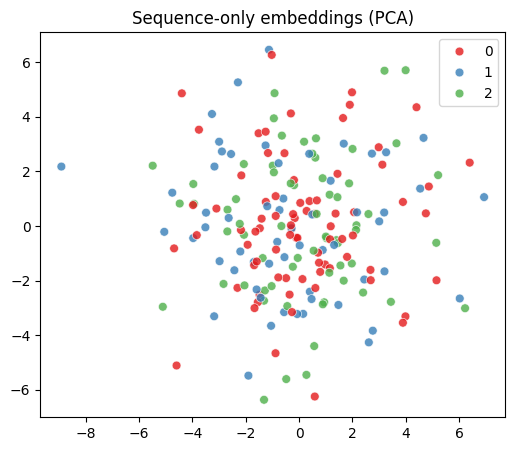

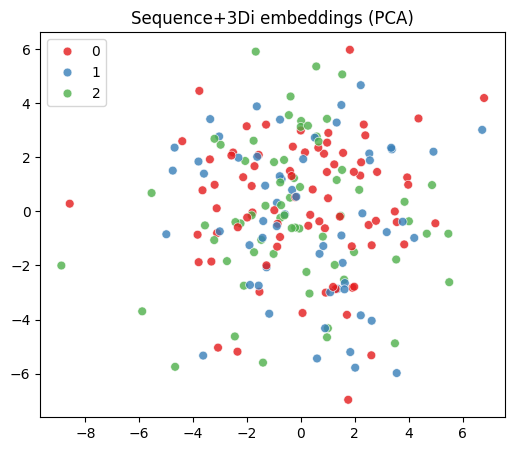

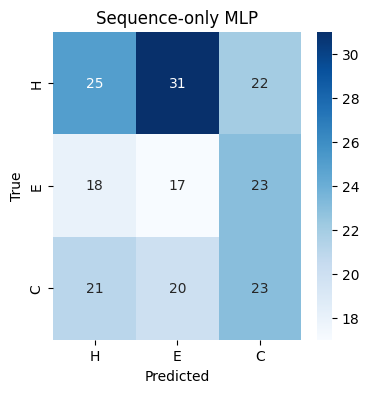

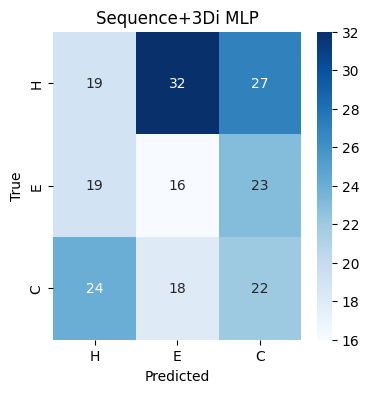

In [20]:
# ---------------------------
# Visualization
# ---------------------------
def plot_embeddings(embeddings, labels, title="Embedding PCA"):
    pca = PCA(n_components=2)
    emb_2d = pca.fit_transform(embeddings)
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=emb_2d[:,0], y=emb_2d[:,1], hue=labels, palette="Set1", s=40, alpha=0.8)
    plt.title(title)
    plt.show()

plot_embeddings(emb_test_seq, labels_seq, title="Sequence-only embeddings (PCA)")
plot_embeddings(emb_test_struct, labels_struct, title="Sequence+3Di embeddings (PCA)")

# Confusion matrices
def plot_confusion(preds, labels, title="Confusion Matrix"):
    cm = confusion_matrix(labels, preds)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['H','E','C'], yticklabels=['H','E','C'])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

plot_confusion(preds_seq, labels_seq, title="Sequence-only MLP")
plot_confusion(preds_struct, labels_struct, title="Sequence+3Di MLP")